In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, ConfusionMatrixDisplay
from sklearn import metrics
# from sklearn.metrics import mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import sklearn.preprocessing as preproc

In [83]:
# Load the data
cp = pd.read_csv('complaints_25Nov21.csv')
cp

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,NaN,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NaN,NaN,NaN,Consent provided,Web,2016-10-29,Closed with explanation,Yes,No,2180490
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,No,1305453
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",NaN,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,NaN,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,No,1337613
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,JPMORGAN CHASE & CO.,VA,22406,Servicemember,NaN,Phone,2013-04-30,Closed with explanation,Yes,Yes,393900
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,NaN,NaN,Referral,2013-05-31,Closed with explanation,Yes,No,418647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,2015-05-24,Debt collection,Credit card,Taking/threatening an illegal action,Sued w/o proper notification of suit,NaN,NaN,JPMORGAN CHASE & CO.,FL,33133,NaN,Consent not provided,Web,2015-05-24,Closed with explanation,Yes,No,1390395
207256,2012-01-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,JPMORGAN CHASE & CO.,NY,10312,NaN,NaN,Referral,2012-01-11,Closed without relief,Yes,Yes,12192
207257,2012-07-17,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,032XX,NaN,NaN,Web,2012-07-18,Closed with explanation,Yes,No,118351
207258,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,900XX,NaN,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969


In [85]:
# Split the dataframe between X and y
X = cp[['Product', 'Sub-product', 'Issue', 'State', 'Tags', 'Submitted via',  'Company response to consumer', 'Timely response?']]
y = cp[['Consumer disputed?']]

In [86]:
dispute_proportion_test = y_test.mean()
print(f"Proportion of consumers who raised a dispute in the test set: {dispute_proportion_test}")

Proportion of consumers who raised a dispute in the test set: 0.21586413200810575


In [87]:
###Undersampling: Reduce Observations for Majority Class
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=123)
X_res, y_res = undersampler.fit_resample(X, z)

In [88]:
#Check the value of consumers who raised a dispute in the training set after undersampling and we can see the proportion is 0.5
y_res.value_counts()

Consumer disputed?
No                    44903
Yes                   44903
Name: count, dtype: int64

In [103]:
##Fit the XGBClassifier model
# Test train split
X = cp[['Product', 'Sub-product', 'Issue', 'State', 'Tags', 'Submitted via',  'Company response to consumer', 'Timely response?']]
X = pd.get_dummies(X)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(cp['Consumer disputed?'])
featuer_names = cp[['Product', 'Sub-product', 'Issue', 'State', 'Tags', 'Submitted via',  'Company response to consumer', 'Timely response?']].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

In [104]:
#If proportion of disputes is less than 30%, then undersample with random_state = 123
proportion_disputed = y_train.mean()

if proportion_disputed < 0.3:
    undersampler = RandomUnderSampler(random_state=123)
    X_train, y_train = undersampler.fit_resample(X, y)

In [105]:
#Train the model
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state = 123)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [106]:
# Perform predictions, and store the results in a variable called 'y_pred'
y_pred = model_xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      0.53      0.66     32504
           1       0.28      0.66      0.39      8948

    accuracy                           0.56     41452
   macro avg       0.57      0.60      0.52     41452
weighted avg       0.73      0.56      0.60     41452



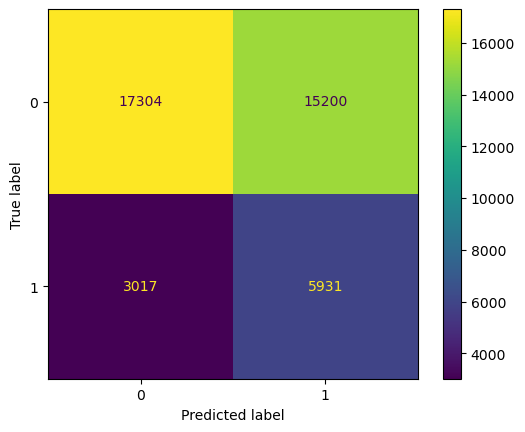

In [107]:
# Check the classification report and the confusion matrix
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test);

In [97]:
#total cost if there were no model
total_cost = y_test.sum()*500 + len(y_test) * 100
print("If there were no model, the total cost to the banks of dealing with the complaints in the test set would be:", total_cost)

If there were no model, the total cost to the banks of dealing with the complaints in the test set would be: 8619200


In [108]:
#total cost if there were model
sum_of_diligence_cost = y_pred.sum()*90
sum_of_dispute_cost = (1-(report['1']['recall']))*(y_test.sum())*500
complaint_cost = len(y_test) * 100
total_cost = sum_of_diligence_cost + sum_of_dispute_cost + complaint_cost
print("Total cost to the banks of dealing with the complaints in the test set based on the model results:",total_cost)

Total cost to the banks of dealing with the complaints in the test set based on the model results: 7555490.0


In [109]:
#Change the classification threshold on the model to calculate the lowest total cost and the corresponding threshold
pred_prob = model_xgb.predict_proba(X_test)
pred_prob = pred_prob[:,1]
thresholds = np.linspace(0, 1, 50)
costs = []

for threshold in thresholds:
    y_pred = (pred_prob>threshold).astype(int)
    total_cost = 0
    for i in range(len(y_test)):
        total_cost += 100
        if y_pred[i] == 1:
            total_cost += 90;
        elif y_test[i] == 1:
            total_cost += 500
    costs.append(total_cost)

min_cost = min(costs)
optimal_threshold = thresholds[costs.index(min_cost)]
print("The lowest total cost to the bank is:", min_cost,
      "which is achieved when threshold is ", optimal_threshold)

The lowest total cost to the bank is: 7492290 which is achieved when threshold is  0.4693877551020408
